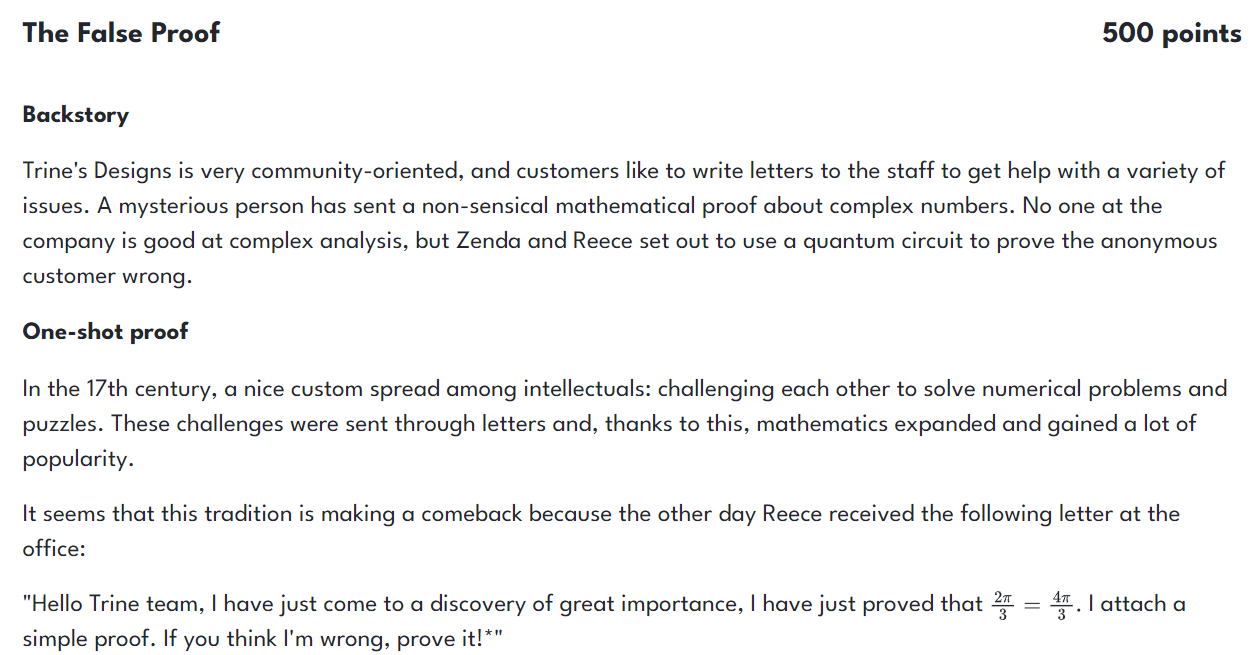

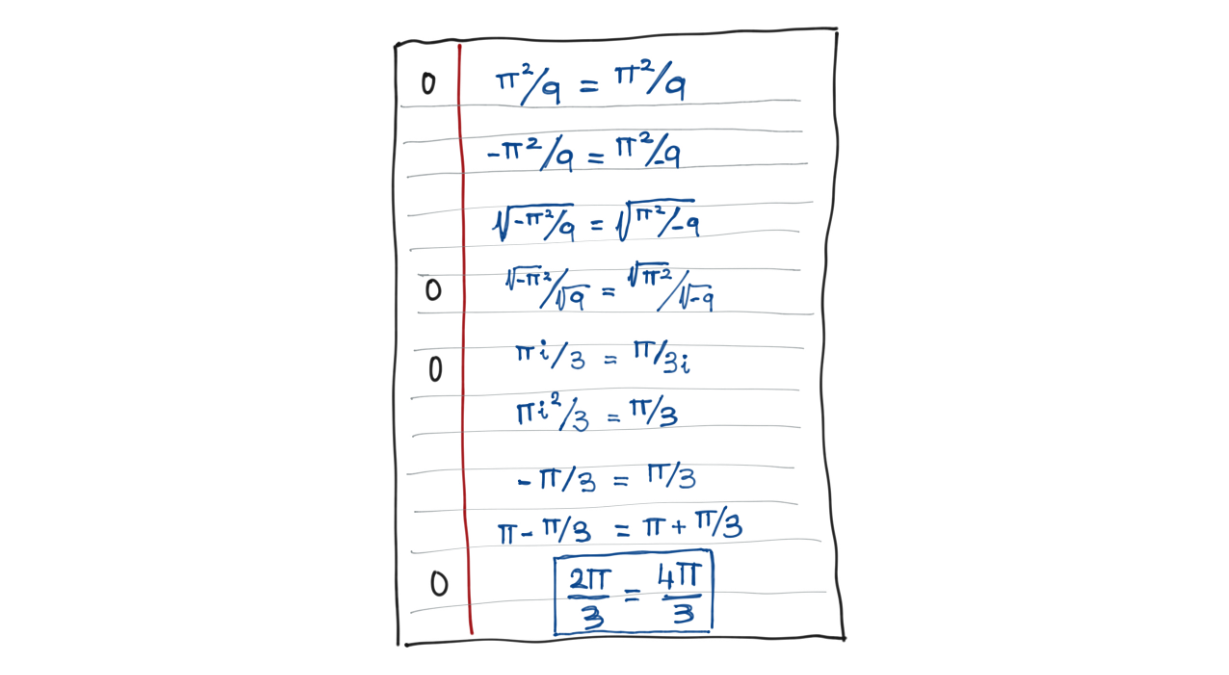

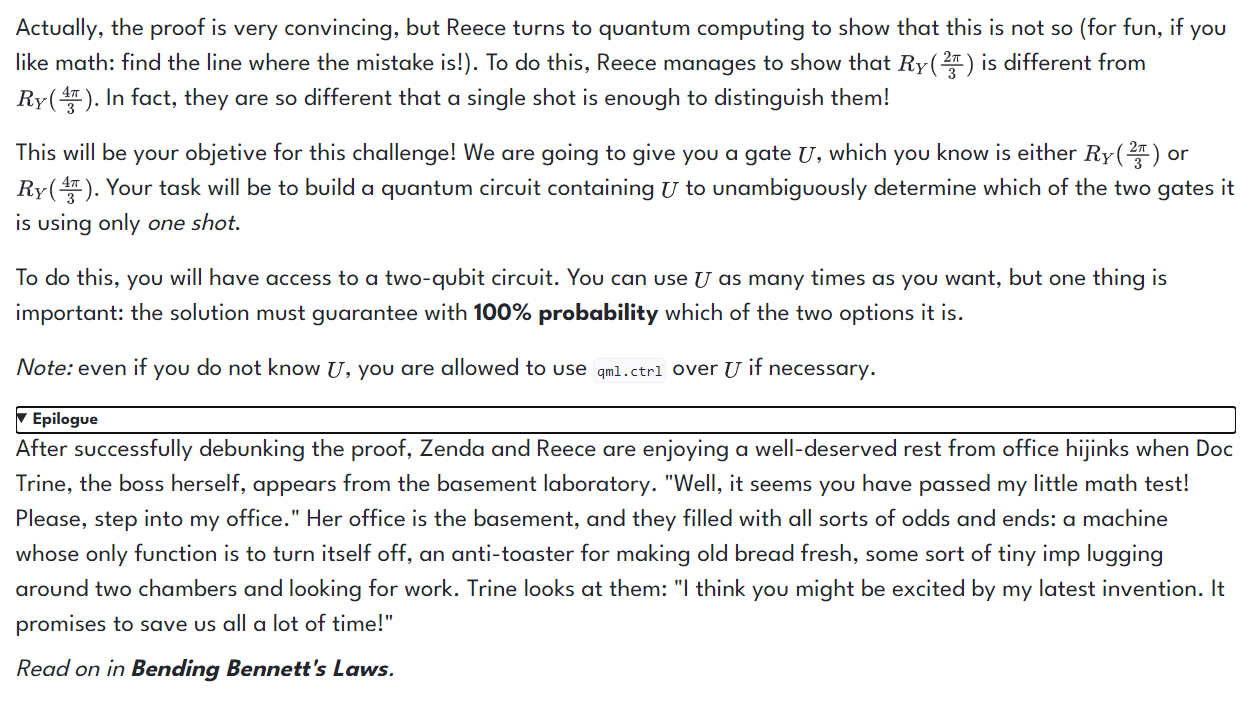

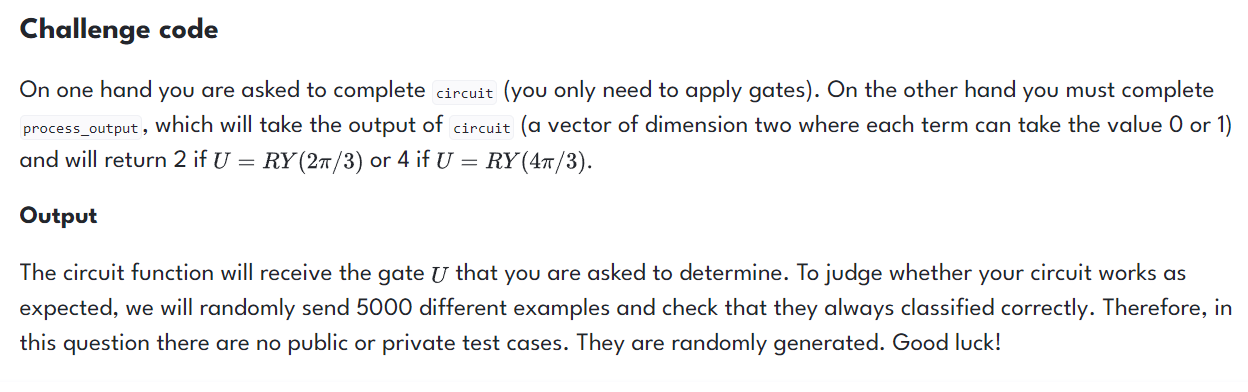

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=2, shots=1)
dev.operations.add("op")
dev.operations.add("C(op)")


@qml.qnode(dev)
def circuit(U):
    """This will be the circuit you will use to determine which of the two angles we have.
    Remember that only a single shot will be executed.

    Args:
        U (qml.ops): It is the gate to discriminate between  RY(2pi/3) or RY(4pi/3).

    Returns:
        (numpy.tensor): Vector of two elements representing the output measured in each of the qubits.
    """
    # Put your code here #
    # to use U,  call 'U(wires = <wire where you want to apply the gate>)'
    # to use Control-U, call 'qml.ctrl(U, control = <control wire>)(wires = <wire where you want to apply the gate>)'
    qml.RY(-2*np.pi/3, wires=0)
    U(wires=0)
    qml.RY(-4*np.pi/3, wires=1)
    U(wires=1)
    return qml.sample(wires=range(2))

def process_output(measurement):
    """This function processes the output of the circuit to discriminate between gates.

    Args:
        measurement (numpy.array): Output of the previous circuit a vector of dimension 2.

    Returns:
        (int): return 2 or 4 depending on the associated RY gate.
    """
    # Put your code here #
    print(measurement)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:
    numbers = 2 * np.random.randint(1, 3, 5000)

    def U2(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(2 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    def U4(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(4 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    output = []
    for i in numbers:
        if i == 2:
            U = U2
        else:
            U = U4
        out = circuit(U)
        output.append(process_output(out))

    assert np.allclose(
        output, numbers, rtol=1e-4
    ), "Your circuit does not give the correct output."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
[0 1]
[0 0]
[1 0]
[0 1]
[1 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 1]
[0 1]
[0 0]
[0 0]
[1 0]
[0 0]
[0 1]
[0 1]
[0 1]
[0 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 0]
[0 0]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 0]
[1 0]
[1 0]
[0 1]
[0 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 0]
[1 0]
[0 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[0 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 0]
[0 1]
[0 0]
[0 1]
[0 1]
[1 0]
[0 0]
[1 0]
[0 0]
[0 1]
[0 1]
[0 0]
[1 0]
[0 0]
[0 1]
[1 0]
[0 1]
[0 0]
[1 0]
[0 1]
[0 0]
[0 1]
[0 0]
[1 0]
[0 1]
[0 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 0]
[1 0]
[1 0]
[0 0]
[0 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 0]
[1 0]
[0 0]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 0]
[1 0]
[1 0]
[0 1]
[0 1]
[

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''